
# CS5228 Project - Team not found




In [1]:
# import packages

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import category_encoders as ce
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## Load Data

In [2]:
path = './'

cleaned_train_df = pd.read_csv(path + 'data/clean_train.csv', index_col = 0)
cleaned_test_df = pd.read_csv(path + 'data/clean_test.csv', index_col = 0)

## Data Information

In [3]:
# duplicate dataset
train_df = cleaned_train_df.copy()
test_df = cleaned_test_df.copy()

In [4]:
print(train_df.shape)
print(test_df.shape)

(26048, 16)
(7500, 15)


In [5]:
train_df.head()
# train_df[train_df['model'].isnull()]

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms,price
0,2,1,3,4.0,4,0,32,1.239337,103.837487,0,11.0,151.0,2336.0,10,0,5390000.0
1,1,0,3,3.0,11,0,20,1.319533,103.847030,1,23.0,24.0,1259.0,10,0,2310000.0
2,2,1,4,3.0,11,0,20,1.315656,103.844445,1,10.0,235.0,1959.0,9,0,5279500.0
3,2,1,3,2.0,14,1,1,1.329367,103.905791,1,92.0,237.0,883.0,2,0,1843600.0
4,1,0,3,3.0,15,1,1,1.309176,103.911352,1,6.0,36.0,1066.0,3,0,2262700.0


In [6]:
print(train_df.dtypes)

type                     int64
model                    int64
bedrooms                 int64
bathrooms              float64
district                 int64
region                   int64
planning_area            int64
lat                    float64
lng                    float64
freehold                 int64
since_built_year       float64
no_of_units            float64
area_size              float64
since_listing_month      int64
additional_rooms         int64
price                  float64
dtype: object


In [7]:
train_df.describe(include = 'all')

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms,price
count,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,2.604800e+04
mean,1.464105,0.497082,2.547720,2.281826,12.211609,0.819218,17.493666,1.321145,103.846138,0.402756,24.528140,466.408477,1248.918612,3.938920,0.078432,2.994669e+06
std,0.498719,0.559363,1.102333,1.150483,7.020134,1.363174,10.677163,0.038569,0.049865,0.490462,29.916885,419.711808,1066.075377,2.023548,0.271414,4.324294e+06
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.239337,103.696215,0.000000,-1.000000,1.000000,226.000000,2.000000,0.000000,5.566000e+05
25%,1.000000,0.000000,2.000000,1.000000,7.000000,0.000000,9.000000,1.296472,103.820262,0.000000,5.000000,134.000000,678.000000,3.000000,0.000000,1.331000e+06
50%,1.000000,0.000000,3.000000,2.000000,11.000000,0.000000,17.000000,1.313384,103.843081,0.000000,9.000000,376.000000,958.000000,3.000000,0.000000,1.851800e+06
75%,2.000000,1.000000,3.000000,3.000000,18.000000,1.000000,26.000000,1.341210,103.879673,1.000000,37.000000,646.000000,1356.000000,5.000000,0.000000,2.948000e+06
max,2.000000,3.000000,9.000000,10.000000,28.000000,4.000000,38.000000,1.456436,103.976016,1.000000,223.000000,2203.000000,15000.000000,19.000000,2.000000,7.480000e+07


In [8]:
test_df.describe(include= 'all')

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms
count,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.46680,0.500933,2.548800,2.278267,12.328800,0.829067,17.436933,1.321499,103.845887,0.416133,24.822000,463.934933,1243.848933,3.916800,0.074400
std,0.49893,0.560394,1.107211,1.131697,6.998287,1.373305,10.590192,0.038504,0.049830,0.492949,29.437414,419.488594,1042.264937,1.955093,0.267471
min,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.239337,103.695609,0.000000,-1.000000,6.000000,337.000000,2.000000,0.000000
25%,1.00000,0.000000,2.000000,1.000000,7.000000,0.000000,9.000000,1.297150,103.819293,0.000000,6.000000,130.000000,688.000000,3.000000,0.000000
50%,1.00000,0.000000,2.000000,2.000000,11.000000,0.000000,17.000000,1.313062,103.842768,0.000000,9.000000,376.000000,958.000000,3.000000,0.000000
75%,2.00000,1.000000,3.000000,3.000000,18.000000,1.000000,26.000000,1.341303,103.880561,1.000000,37.000000,660.000000,1356.000000,5.000000,0.000000
max,2.00000,3.000000,10.000000,8.000000,28.000000,4.000000,38.000000,1.451400,103.980549,1.000000,223.000000,2203.000000,13950.000000,14.000000,2.000000


In [9]:
# check for duplicate listing
# exact duplicate (from current attributes)
train_df[train_df.bathrooms==10]

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms,price
17707,1,0,4,10.0,3,0,22,1.282961,103.839815,0,92.0,774.0,5479.0,3,1,19360000.0


## Data Pre-processing

In [10]:
# convert binary to binary encoding
# type: condo: 1 apartment:0
train_df['type'] = train_df['type'] -1
test_df['type'] = test_df['type'] -1
# freehold: 1: freehold 0:leasehold

In [11]:
# normalize numerical values
# min-max normalization: lat, lng, additional_rooms 
scaler = MinMaxScaler()
train_df[['lat', 'lng', 'additional_rooms']] = scaler.fit_transform(train_df[['lat', 'lng', 'additional_rooms']]) 

# transform test dataset 
test_df[['lat', 'lng', 'additional_rooms']] = scaler.transform(test_df[['lat', 'lng', 'additional_rooms']])
test_df.describe(include = 'all')
# maybe use singapores own lat, lng range for range
# need to document the min, max and bound test dataset that exceeds limits to min max in training
test_df.loc[test_df.lat > 1, 'lat'] = 1
test_df.loc[test_df.lat < 0, 'lat'] = 0

test_df.loc[test_df.lng > 1, 'lng'] = 1
test_df.loc[test_df.lng < 0, 'lng'] = 0

# may come back to the null value definition here!!!!

# standardization: bedrooms, bathrooms, built year, area size, listing, no_of_units
scaler = StandardScaler()
train_df[['bedrooms', 'bathrooms', 'since_built_year', 
          'no_of_units', 'area_size', 'since_listing_month']] = scaler.fit_transform(train_df[['bedrooms', 'bathrooms', 'since_built_year', 'no_of_units', 'area_size', 'since_listing_month']]) 

# transform test dataset 
test_df[['bedrooms', 'bathrooms', 'since_built_year', 
          'no_of_units', 'area_size', 'since_listing_month']] = scaler.transform(test_df[['bedrooms', 'bathrooms', 'since_built_year', 'no_of_units', 'area_size', 'since_listing_month']]) 

# train_df
test_df.describe(include = 'all')

,type,model,bedrooms,bathrooms,district,region,planning_area,lat,lng,freehold,since_built_year,no_of_units,area_size,since_listing_month,additional_rooms
count,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.46680,0.500933,0.000980,-0.003094,12.328800,0.829067,17.436933,0.378456,0.534922,0.416133,0.009823,-0.005894,-0.004756,-0.010932,0.037200
std,0.49893,0.560394,1.004444,0.983690,6.998287,1.373305,10.590192,0.177358,0.178086,0.492949,0.983992,0.999487,0.977684,0.966189,0.133736
min,0.00000,0.000000,-1.404067,-1.114184,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.853318,-1.096984,-0.855414,-0.958197,0.000000
25%,0.00000,0.000000,-0.496883,-1.114184,7.000000,0.000000,9.000000,0.266300,0.439878,0.000000,-0.619332,-0.801538,-0.526163,-0.464006,0.000000
50%,0.00000,0.000000,-0.496883,-0.244968,11.000000,0.000000,17.000000,0.339591,0.523777,0.000000,-0.519053,-0.215410,-0.272893,-0.464006,0.000000
75%,1.00000,1.000000,0.410302,0.624249,18.000000,1.000000,26.000000,0.469677,0.658847,1.000000,0.416892,0.461258,0.100446,0.524376,0.000000
max,1.00000,3.000000,6.760594,4.970332,28.000000,4.000000,38.000000,0.976802,1.000000,1.000000,6.634236,4.137660,11.914097,4.972096,1.000000


In [12]:
# categorical values
# binary: type, freehold, 
# nominal: model, district, region, planning area

# One Hot Encoding: model, region
# Create object for one-hot encoding
# creating instance of one-hot-encoder
enc1 = OneHotEncoder()
dummy1 = pd.DataFrame(enc1.fit_transform(train_df[['model']]).toarray(), columns = ['model_0', 'model_1', 'model_2', 'model_3'])
# merge with main df 
train_df = train_df.join(dummy1)

enc2 = OneHotEncoder()
dummy2 = pd.DataFrame(enc2.fit_transform(train_df[['region']]).toarray(), columns = ['region_0', 'region_1', 'region_2', 'region_3', 'region_4'])
# merge with main df 
train_df = train_df.join(dummy2)

train_df = train_df.drop(columns = ['model', 'region'])
train_df

,type,bedrooms,bathrooms,district,planning_area,lat,lng,freehold,since_built_year,no_of_units,...,price,model_0,model_1,model_2,model_3,region_0,region_1,region_2,region_3,region_4
0,1,0.410302,1.493466,4,32,0.000000,0.504903,0,-0.452199,-0.751503,...,5390000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.410302,0.624249,11,20,0.369401,0.539009,1,-0.051081,-1.054097,...,2310000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1.317486,0.624249,11,20,0.351540,0.529769,1,-0.485626,-0.551361,...,5279500.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.410302,-0.244968,14,1,0.414697,0.749020,1,2.255354,-0.546596,...,1843600.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0.410302,0.624249,15,1,0.321693,0.768894,1,-0.619332,-1.025505,...,2262700.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,1,0.410302,0.624249,8,15,0.320402,0.596331,0,-0.318493,0.318300,...,2750000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26044,1,0.410302,0.624249,10,34,0.354335,0.460952,1,2.255354,-1.070775,...,6449300.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26045,1,-0.496883,-0.244968,18,33,0.469677,0.918986,0,-0.552479,-0.394108,...,1306800.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26046,1,1.317486,0.624249,22,13,0.443210,0.165124,0,-0.619332,0.647103,...,2420000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
# test dataset
temp = pd.DataFrame(enc1.transform(test_df[['model']]).toarray(), columns = ['model_0', 'model_1', 'model_2', 'model_3'])
test_df = test_df.join(temp)
temp = pd.DataFrame(enc2.transform(test_df[['region']]).toarray(), columns = ['region_0', 'region_1', 'region_2', 'region_3', 'region_4'])
test_df = test_df.join(temp)
test_df = test_df.drop(columns = ['model', 'region'])

In [14]:
test_df

,type,bedrooms,bathrooms,district,planning_area,lat,lng,freehold,since_built_year,no_of_units,...,additional_rooms,model_0,model_1,model_2,model_3,region_0,region_1,region_2,region_3,region_4
0,1,-0.496883,-0.244968,10,6,0.341915,0.382426,1,1.252556,0.408840,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.410302,-0.244968,15,15,0.272228,0.672597,1,-0.619332,-0.801538,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,-1.404067,-1.114184,15,1,0.361653,0.760150,1,-0.519053,-0.737207,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,-0.496883,-1.114184,17,23,0.546606,0.963223,0,2.255354,-0.091513,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1.317486,3.231899,1,10,0.175666,0.547546,0,-0.652759,0.103863,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1,-1.404067,-1.114184,3,31,0.231567,0.518446,0,-0.051081,0.060975,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7496,1,-0.496883,-0.244968,15,15,0.263810,0.610629,0,0.015773,0.644720,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7497,0,0.410302,-0.244968,23,3,0.626063,0.219142,0,2.255354,-0.934965,...,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7498,1,-0.496883,-1.114184,28,29,0.733540,0.637659,0,-0.786465,0.639955,...,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Target Encoding: district, planning area
#Create target encoding object
encoder=ce.TargetEncoder(cols='district') 
train_df['district']  = encoder.fit_transform(train_df['district'],train_df['price'])
# fit test data
test_df['district'] = encoder.transform(test_df['district'])

test_df

,type,bedrooms,bathrooms,district,planning_area,lat,lng,freehold,since_built_year,no_of_units,...,additional_rooms,model_0,model_1,model_2,model_3,region_0,region_1,region_2,region_3,region_4
0,1,-0.496883,-0.244968,4.747940e+06,6,0.341915,0.382426,1,1.252556,0.408840,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.410302,-0.244968,3.062476e+06,15,0.272228,0.672597,1,-0.619332,-0.801538,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,-1.404067,-1.114184,3.062476e+06,1,0.361653,0.760150,1,-0.519053,-0.737207,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,-0.496883,-1.114184,1.385455e+06,23,0.546606,0.963223,0,2.255354,-0.091513,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1.317486,3.231899,4.858799e+06,10,0.175666,0.547546,0,-0.652759,0.103863,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1,-1.404067,-1.114184,2.023896e+06,31,0.231567,0.518446,0,-0.051081,0.060975,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7496,1,-0.496883,-0.244968,3.062476e+06,15,0.263810,0.610629,0,0.015773,0.644720,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7497,0,0.410302,-0.244968,1.359181e+06,3,0.626063,0.219142,0,2.255354,-0.934965,...,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7498,1,-0.496883,-1.114184,1.264884e+06,29,0.733540,0.637659,0,-0.786465,0.639955,...,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
encoder=ce.TargetEncoder(cols='planning_area') 
train_df['planning_area']  = encoder.fit_transform(train_df['planning_area'],train_df['price'])
# fit test data
test_df['planning_area'] = encoder.transform(test_df['planning_area'])

In [17]:
# standardize the label to have zero mean and 1 std
# standardization: bedrooms, bathrooms, built year, area size, listing, no_of_units
scaler = StandardScaler()
train_df[['district', 'planning_area']] = scaler.fit_transform(train_df[['district', 'planning_area']]) 

# transform test dataset 
test_df[['district', 'planning_area']] = scaler.transform(test_df[['district', 'planning_area']]) 


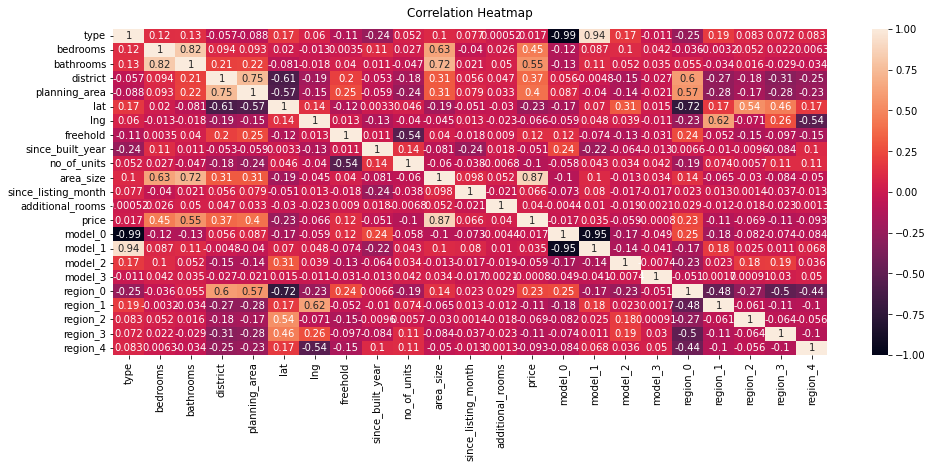

In [18]:
# show confusion matrix for current variables
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

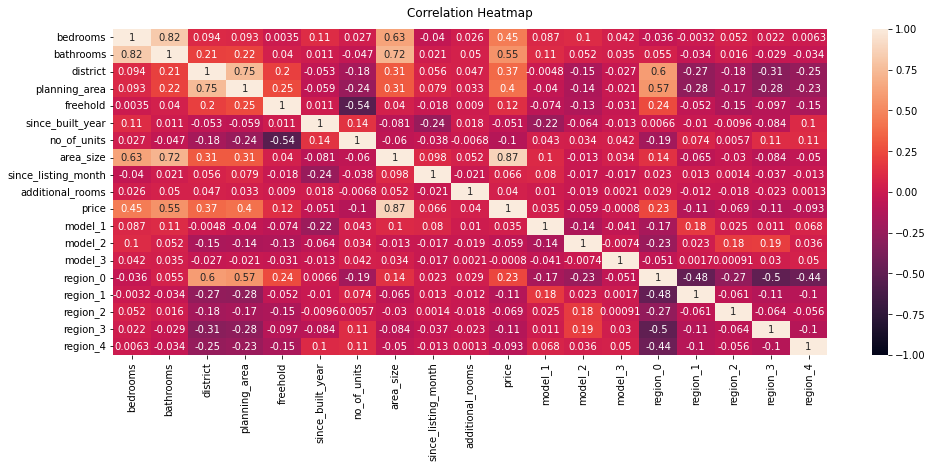

In [19]:
# consider to drop type, lat, lng, model 0 since high correlation within independent variables.
reduced_df = train_df[train_df.columns[~train_df.columns.isin(['type', 'lat', 'lng', 'model_0'])]]


plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(reduced_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [20]:
reduced_test = test_df[test_df.columns[~test_df.columns.isin(['type', 'lat', 'lng', 'model_0'])]]

## Linear Regression Model

In [21]:
# x y split
X_train = train_df.drop(columns = ['price'])
y_train = train_df['price']

# reduced train
X_train_red = reduced_df.drop(columns = ['price'])
y_train_red = reduced_df['price']

In [22]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

### All features - linear regression

In [23]:
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
all_r2_scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
all_rmse = cross_val_score(lm, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)

In [24]:
lm.fit(X_train, y_train)
lm.coef_

array([-1.51535390e+06, -4.84787562e+05, -2.92953703e+05,  1.16961474e+05,
        5.45957751e+05,  2.85808708e+06, -4.90871796e+04,  3.71061222e+05,
        1.26116375e+05,  7.70542796e+04,  4.16322118e+06, -1.22314168e+05,
       -3.41292374e+05,  1.70220603e+18,  1.70220603e+18,  1.70220603e+18,
        1.70220603e+18,  9.67292415e+16,  9.67292415e+16,  9.67292415e+16,
        9.67292415e+16,  9.67292415e+16])

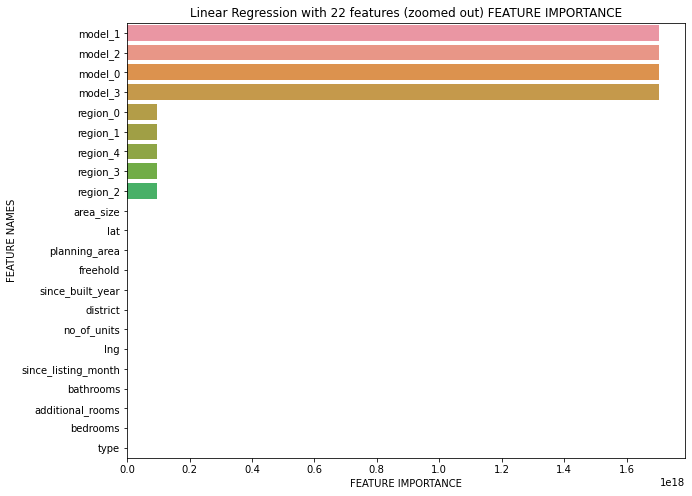

In [25]:
plot_feature_importance(lm.coef_,X_train.columns,'Linear Regression with 22 features (zoomed out)')

(-3000000.0, 3000000.0)

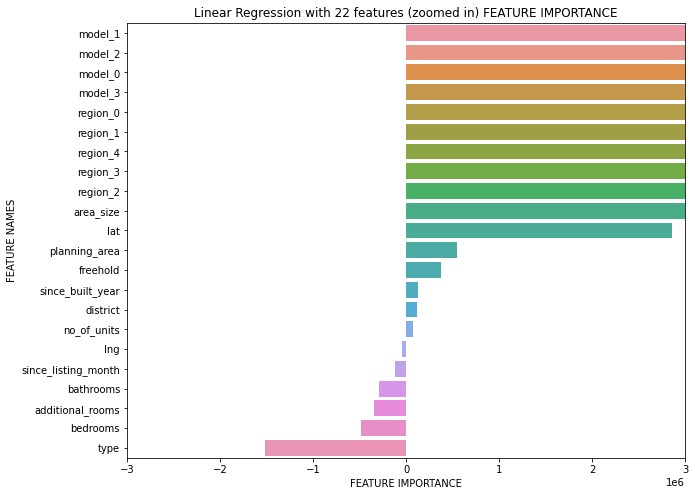

In [26]:
plot_feature_importance(lm.coef_,X_train.columns,'Linear Regression with 22 features (zoomed in)')
plt.xlim(-3*10**(6), 3*10**(6))

## Reduced Features

In [27]:
lm_red = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
red_r2_scores = cross_val_score(lm_red, X_train_red, y_train_red, scoring='r2', cv=folds)
red_rmse = cross_val_score(lm, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)

In [28]:
lm_red.fit(X_train_red, y_train_red)
lm_red.coef_

array([ -469671.86230597,  -297753.69191421,    28928.20928367,
         479579.50917507,   452803.39196548,   142511.99778472,
          41755.96892043,  4138452.29862938,  -127067.10217158,
        -301030.84613312,  -224879.0122406 ,  -281262.25691243,
       -2173066.35842625,    99419.7611494 ,  -111915.44995921,
         -17356.85669946,   159155.41174418,  -129302.86623491])

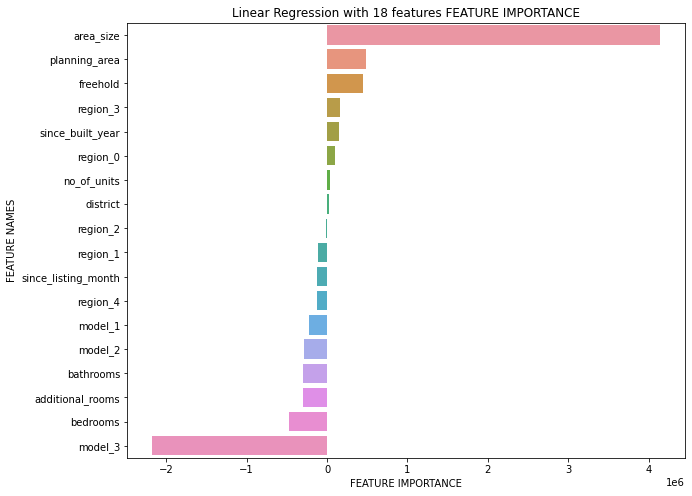

In [29]:
plot_feature_importance(lm_red.coef_,X_train_red.columns,'Linear Regression with 18 features')